In [1]:
import numpy as np
import sklearn
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve, precision_score, accuracy_score, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
from util import evaluate_data, graph_LC, graph_C, normalize_data, create_stratified_data, prepare_data, preprocess_ufc_data

KNeighborsClassifier()
              precision    recall  f1-score   support

           1       0.92      0.95      0.94      1262
           2       0.94      0.93      0.93      1610
           3       0.95      0.93      0.94      1128

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

0.9169551403986475


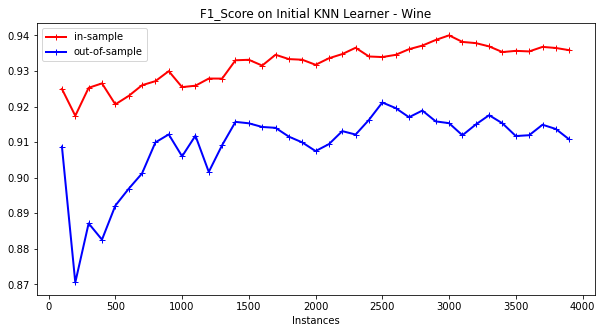

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   12.4s finished


[0.92238418 0.92177667 0.92089025 0.92047541 0.919422   0.91920248
 0.9195329  0.91922694 0.91900153] [0.91744305 0.91920598 0.91920883 0.91872008 0.91672929 0.91521197
 0.91721494 0.91670484 0.91619976]


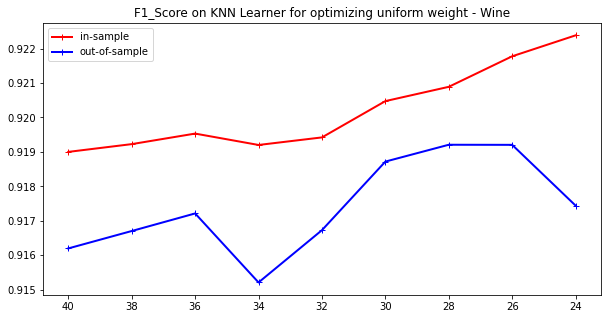

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.0s finished


[1. 1. 1. 1. 1. 1. 1. 1. 1.] [0.92043017 0.91943738 0.91969875 0.92019969 0.91894934 0.91719498
 0.91845615 0.91770986 0.9174576 ]


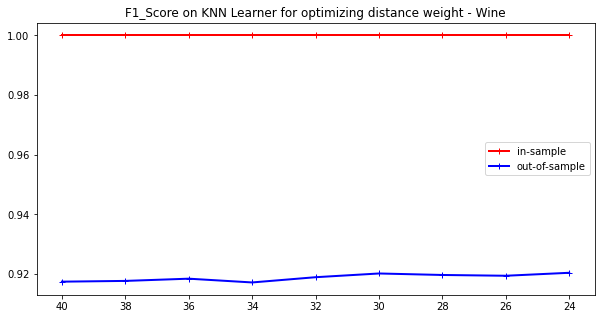

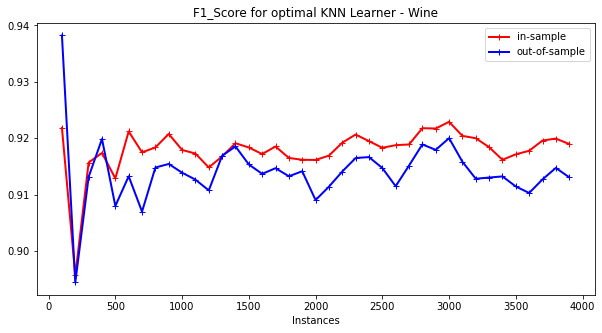

              precision    recall  f1-score   support

           1    0.91411   0.94603   0.92980       315
           2    0.92786   0.92556   0.92671       403
           3    0.93382   0.90071   0.91697       282

    accuracy                        0.92500      1000
   macro avg    0.92526   0.92410   0.92449      1000
weighted avg    0.92521   0.92500   0.92493      1000

[[298  11   6]
 [ 18 373  12]
 [ 10  18 254]]
KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.69      0.51      0.59       969
         1.0       0.78      0.88      0.83      1904

    accuracy                           0.76      2873
   macro avg       0.74      0.70      0.71      2873
weighted avg       0.75      0.76      0.75      2873

0.53853955624956


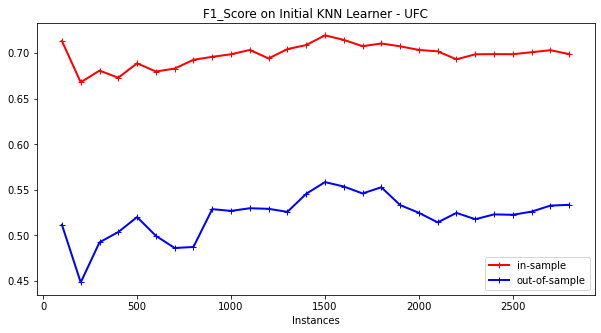

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
/Users/sbhadra/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   13.8s finished


[0.79853387 0.7031372  0.65714532 0.58184089 0.57944057 0.52478806
 0.52031498 0.4824934  0.48880721 0.46181441 0.47131801] [0.52924491 0.53853956 0.54259834 0.50939794 0.51236514 0.4693358
 0.4727108  0.45294045 0.46384162 0.44916346 0.45136128]


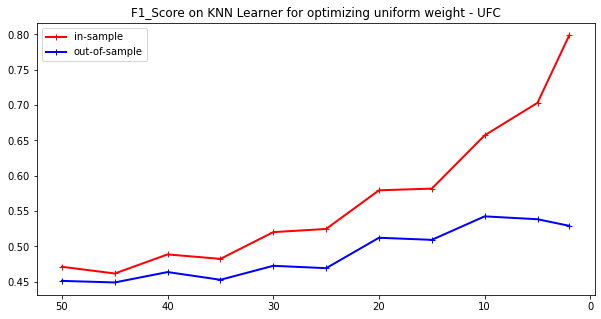

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    5.5s finished


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0.5579247  0.53891182 0.52804714 0.50915166 0.4966352  0.47003628
 0.46346784 0.45075488 0.45234872 0.45182499 0.44462213]


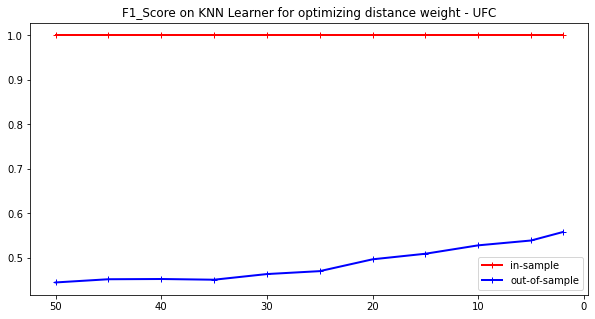

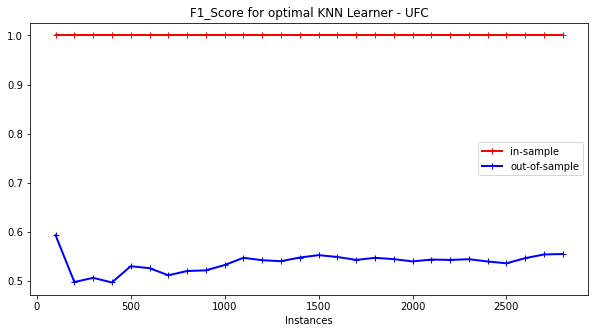

              precision    recall  f1-score   support

         0.0    0.38528   0.36626   0.37553       243
         1.0    0.68443   0.70168   0.69295       476

    accuracy                        0.58832       719
   macro avg    0.53485   0.53397   0.53424       719
weighted avg    0.58332   0.58832   0.58567       719

[[ 89 154]
 [142 334]]


In [2]:
def define_KNN(input_train_set, output_train_set):
    KNN_Learner = KNeighborsClassifier()
    KNN_Learner.fit(input_train_set, output_train_set.values.ravel())
    
    print(KNN_Learner)
    return KNN_Learner

def KNN_predictions(KNN_Learner, input_train_set, output_train_set):
    y_hat = KNN_Learner.predict(input_train_set)
    percent_match = accuracy_score(output_train_set, y_hat)
    print(classification_report(output_train_set, y_hat))
    return percent_match


def compute_score(input_train_set, output_train_set, KNN_Learner, mean, title):
    result = evaluate_data(input_train_set, output_train_set, KNN_Learner, f1_score, average=mean)
    graph_LC(result[0], result[1], result[2], title=title)
    
    
def run_validation_curve(KNN_Learner, input_train_set, output_train_set, hyperparameter_values, weighting, hyperparameter, reverse, cross_validation_splitter, title):
    result_train, result_test = validation_curve(
        KNN_Learner, input_train_set, output_train_set.values.ravel(), param_name=hyperparameter, param_range=hyperparameter_values,
        scoring=weighting, verbose=1, cv=cross_validation_splitter, n_jobs=-1
    )
    print(result_train.mean(axis=1), result_test.mean(axis=1))
    graph_C(result_train.mean(axis=1), result_test.mean(axis=1), hyperparameter_values, title=title, inverse_x=reverse)
    
    return result_train, result_test

def wine_dataset():
    target_feature = "class"
    mean = "weighted"
    weighting = "f1_weighted"
    hyperparameter = "n_neighbors"
    cross_validation_splitter = 10
    n_jobs = -1
    reverse = True
    
    
    np.random.seed(42)
    wine_dataset = pd.read_csv("wine_dataset.csv")
    
    target = wine_dataset[target_feature]
    wine_dataset = normalize_data(wine_dataset)
    wine_dataset[target_feature] = target
    
    in_sample, out_of_sample = create_stratified_data(target_feature, wine_dataset)

    output_train_set, input_train_set, output_test_set, input_test_set = prepare_data(in_sample, out_of_sample, target_feature)
    
    KNN_Learner = define_KNN(input_train_set, output_train_set)
    
    percent_match = KNN_predictions(KNN_Learner, input_train_set, output_train_set)
    
    result = cross_val_score(KNN_Learner, input_train_set, output_train_set.values.ravel(), scoring=weighting, cv=cross_validation_splitter)
    print(result.mean())
    
    compute_score(input_train_set, output_train_set, KNN_Learner, mean, "F1_Score on Initial KNN Learner - Wine")
    
    KNN_Learner = KNeighborsClassifier(n_neighbors=100, weights='uniform')
    
    hyperparameter_values = [24,26,28,30,32,34,36,38,40]
    result_train, result_test = run_validation_curve(KNN_Learner, input_train_set, output_train_set, hyperparameter_values, weighting, hyperparameter, reverse, cross_validation_splitter, "F1_Score on KNN Learner for optimizing uniform weight - Wine")
    
    
    KNN_Learner = KNeighborsClassifier(n_neighbors=100, weights='distance')

    hyperparameter_values = [24,26,28,30,32,34,36,38,40]
    result_train, result_test = run_validation_curve(KNN_Learner, input_train_set, output_train_set, hyperparameter_values, weighting, hyperparameter, reverse, cross_validation_splitter, "F1_Score on KNN Learner for optimizing distance weight - Wine")
    
    optimal_KNN_Learner = KNeighborsClassifier(n_neighbors=28, weights='uniform')
    
    compute_score(input_train_set, output_train_set, optimal_KNN_Learner, mean, "F1_Score for optimal KNN Learner - Wine")

    optimal_KNN_Learner.fit(input_train_set, output_train_set.values.ravel())
    test_y_hat = optimal_KNN_Learner.predict(input_test_set)
    print(classification_report(output_test_set, test_y_hat,digits=5))
    print(confusion_matrix(output_test_set, test_y_hat))
    

def ufc_dataset():
    target_feature = "Winner"
    mean = "macro"
    weighting = "f1_macro"
    hyperparameter = "n_neighbors"
    cross_validation_splitter = 10
    n_jobs = -1
    reverse = True
    
    np.random.seed(42)
    ufc_dataset = pd.read_csv("ufc_data.csv")
    ufc_dataset = preprocess_ufc_data(ufc_dataset)
    ufc_dataset = normalize_data(ufc_dataset)
    
    in_sample, out_of_sample = create_stratified_data(target_feature, ufc_dataset)

    output_train_set, input_train_set, output_test_set, input_test_set = prepare_data(in_sample, out_of_sample, target_feature)
    
    KNN_Learner = define_KNN(input_train_set, output_train_set)
    
    percent_match = KNN_predictions(KNN_Learner, input_train_set, output_train_set)
    
    scores = cross_val_score(KNN_Learner, input_train_set, output_train_set.values.ravel(), scoring=weighting, cv=cross_validation_splitter)
    print(scores.mean())
    
    compute_score(input_train_set, output_train_set, KNN_Learner, mean, "F1_Score on Initial KNN Learner - UFC")
    
    KNN_Learner = KNeighborsClassifier(n_neighbors=100, weights='uniform')

    hyperparameter_values = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    result_train, result_test = run_validation_curve(KNN_Learner, input_train_set, output_train_set, hyperparameter_values, weighting, hyperparameter, reverse, cross_validation_splitter, "F1_Score on KNN Learner for optimizing uniform weight - UFC")
    
    
    KNN_Learner = KNeighborsClassifier(n_neighbors=100, weights='distance')

    hyperparameter_values = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    result_train, result_test = run_validation_curve(KNN_Learner, input_train_set, output_train_set, hyperparameter_values, weighting, hyperparameter, reverse, cross_validation_splitter, "F1_Score on KNN Learner for optimizing distance weight - UFC")

    optimal_KNN_Learner = KNeighborsClassifier(n_neighbors=2, weights='distance')

    compute_score(input_train_set, output_train_set, optimal_KNN_Learner, mean, "F1_Score for optimal KNN Learner - UFC")

    optimal_KNN_Learner.fit(input_train_set, output_train_set.values.ravel())
    test_y_hat = optimal_KNN_Learner.predict(input_test_set)
    print(classification_report(output_test_set, test_y_hat,digits=5))
    print(confusion_matrix(output_test_set, test_y_hat))
    
    
if __name__ == "__main__":
    wine_dataset()
    ufc_dataset()